# 项目：用线性回归预测房价数据

## 分析目标

此数据分析报告的目的是，基于已有的房屋销售价格，以及有关该房屋的属性，进行线性回归分析，从而利用得到的线性回归模型，能对以下未知售价的房屋根据属性进行价格预测：

面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

## 简介

数据集`house_price.csv`记录了超过五百栋房屋的交易价格，以及房屋的相关属性信息，包括房屋面积、卧室数、厕所数、楼层数、是否位于主路、是否有客房，等等。

`house_price.csv`每列的含义如下：
- price：房屋出售价格
- area：房屋面积，以平方英尺为单位
- bedrooms：卧室数
- bathrooms：厕所数
- stories：楼层数
- mainroad：是否位于主路
   - yes  是
   - no	  否
- guestroom：是否有客房
   - yes  是
   - no	  否
- basement：是否有地下室
   - yes  是
   - no	  否
- hotwaterheating：是否有热水器
   - yes  是
   - no	  否
- airconditioning：是否有空调
   - yes  是
   - no	  否
- parking：车库容量，以车辆数量为单位
- prefarea：是否位于城市首选社区
   - yes  是
   - no	  否
- furnishingstatus：装修状态
   - furnished       精装
   - semi-furnished	 简装
   - unfurnished     毛坯

# 1.读取数据

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_house_price = pd.read_csv("house_price.csv")
original_house_price.head(10)
original_house_price.sample(20)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
154,5530000,3650,3,2,2,yes,no,no,no,no,2,no,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
406,3465000,5320,2,1,1,yes,no,no,no,no,1,yes,unfurnished
527,2275000,1836,2,1,1,no,no,yes,no,no,0,no,semi-furnished
348,3815000,3150,2,2,1,no,no,yes,no,no,0,no,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
74,6650000,4040,3,1,2,yes,no,yes,yes,no,1,no,furnished
92,6405000,4800,3,2,4,yes,yes,no,no,yes,0,no,furnished
520,2450000,7700,2,1,1,yes,no,no,no,no,0,no,unfurnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished


# 2.评估和清理数据

In [3]:
cleaned_house_price = original_house_price.copy()
cleaned_house_price

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## 2.1数据整齐度
从头部的10行数据来看，数据符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”，因此不存在结构性问题。

## 2.2数据干净程度（数据类型、缺失值、重复数据、不一致数据、错误或无效数据）

In [4]:
cleaned_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


缺失、重复数据没有问题。接下来评估不一致数据，其中类型为object的数据都有可能是不一致数据，
分别是：mainroad、guestroom 、basement、hotwaterheating、airconditioning、prefarea、furnishingstatus

In [5]:
cleaned_house_price["mainroad"].value_counts() #没啥问题，是否在主路上，只有是和否

mainroad
yes    468
no      77
Name: count, dtype: int64

In [6]:
cleaned_house_price["guestroom"].value_counts() 

guestroom
no     448
yes     97
Name: count, dtype: int64

In [7]:
cleaned_house_price["basement"].value_counts() 

basement
no     354
yes    191
Name: count, dtype: int64

In [8]:
cleaned_house_price["hotwaterheating"].value_counts() 

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [9]:
cleaned_house_price["airconditioning"].value_counts() 

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [10]:
cleaned_house_price["prefarea"].value_counts() 

prefarea
no     417
yes    128
Name: count, dtype: int64

In [11]:
cleaned_house_price["furnishingstatus"].value_counts() 

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

以上数据都没有什么问题，接下来评估错误或者无效数据

In [12]:
cleaned_house_price.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


从以上统计信息来看，'cleaned_house_price`里不存在脱离现实意义的数值。

# 3.探索数据（数据可视化）

In [13]:
# 设置图表色盘为"pastel"
sns.set_palette("pastel")

## 3.1房价的直方图和箱型图分布

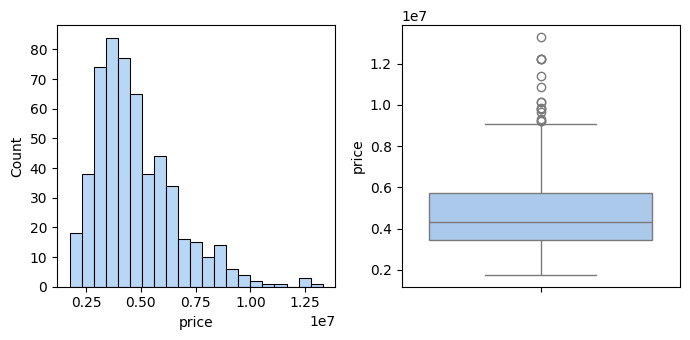

In [14]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]#
plt.rcParams["figure.autolayout"] = True
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_house_price, x='price', ax=axes[0])
sns.boxplot(cleaned_house_price, y='price', ax=axes[1])
plt.show()

## 3.2面积的分布

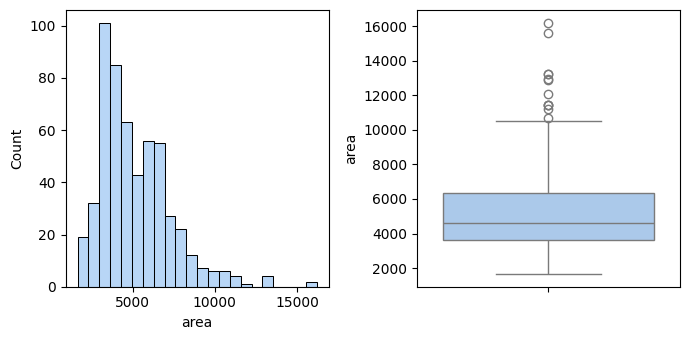

In [15]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_house_price, x='area', ax=axes[0])
sns.boxplot(cleaned_house_price, y='area', ax=axes[1])
plt.show()

## 3.3房价与面积的关系

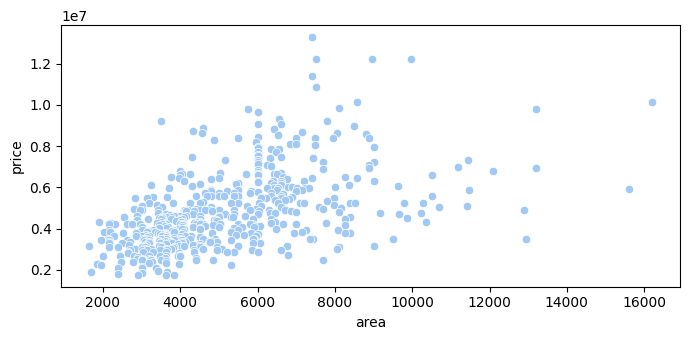

In [16]:
sns.scatterplot(cleaned_house_price, x='area', y='price')
plt.show()

## 3.4卧室数与房价

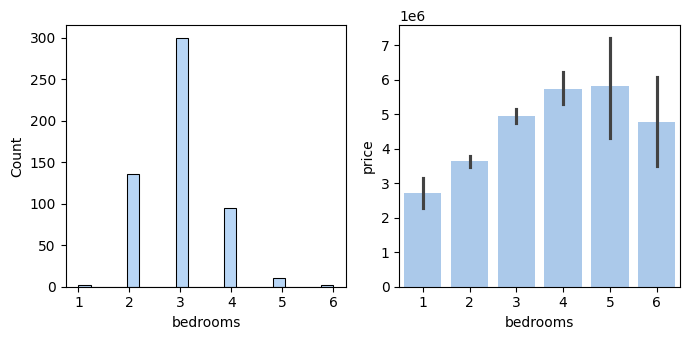

In [17]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_house_price, x='bedrooms', ax=axes[0])
sns.barplot(cleaned_house_price, x='bedrooms', y='price', ax=axes[1])
plt.show()

## 3.5是否在主路与房价

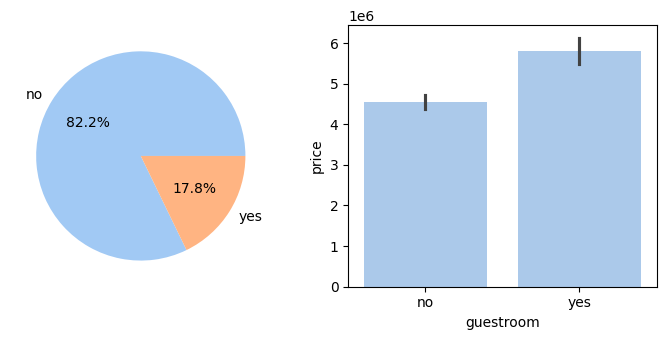

In [18]:
figure,axes = plt.subplots(1,2)
guestroom_count = cleaned_house_price['guestroom'].value_counts()
guestroom_label = guestroom_count.index
axes[0].pie(guestroom_count,labels = guestroom_label, autopct='%.1f%%')
sns.barplot(cleaned_house_price,x='guestroom',y='price',ax=axes[1])
plt.show()

## 3.6装修状态与房价

C:\Users\hcr\AppData\Local\Temp\ipykernel_247856\2706644524.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


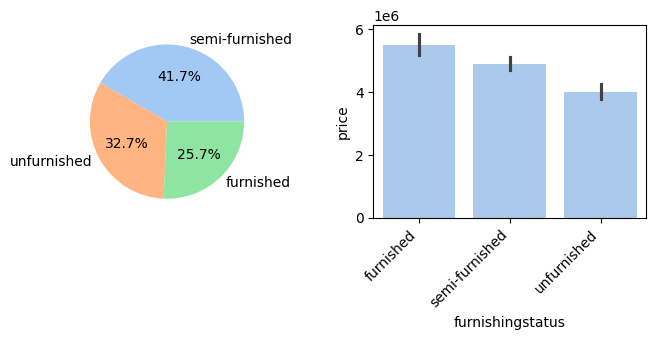

In [19]:
figure,axes = plt.subplots(1,2)
furnishingstatus_count = cleaned_house_price['furnishingstatus'].value_counts()
furnishingstatus_label = furnishingstatus_count.index
axes[0].pie(furnishingstatus_count,labels = furnishingstatus_label, autopct='%.1f%%')
sns.barplot(cleaned_house_price,x='furnishingstatus',y='price',ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
plt.show()

# 4.分析数据

分析流程：
1.引入函数statsmodule
2.copy数据，建立新的DataFrame
3.分类变量转化成虚拟变量pd.get_dummies,关键变量在columns体现，记得dtype=int
4.划分自变量和因变量，利用corr判断自变量之间的相关性，abs大于0.8剔除
5.给模型x添加截距sm.add_constant
6.fit拟合
7.summary总结获取信息，判断p值
8.移除变量，重新回归

In [20]:
import statsmodels.api as sm

In [21]:
lr_house_price = cleaned_house_price.copy()
lr_house_price

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [22]:
lr_house_price = pd.get_dummies(lr_house_price,drop_first = True,columns=['mainroad', 'guestroom',
                                                         'basement', 'hotwaterheating',
                                                         'airconditioning','prefarea', 
                                                         'furnishingstatus'],dtype = int)
lr_house_price

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [23]:
y = lr_house_price['price']
x = lr_house_price.drop('price',axis=1)

In [24]:
x.corr().abs()>0.8

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
stories,False,False,False,True,False,False,False,False,False,False,False,False,False
parking,False,False,False,False,True,False,False,False,False,False,False,False,False
mainroad_yes,False,False,False,False,False,True,False,False,False,False,False,False,False
guestroom_yes,False,False,False,False,False,False,True,False,False,False,False,False,False
basement_yes,False,False,False,False,False,False,False,True,False,False,False,False,False
hotwaterheating_yes,False,False,False,False,False,False,False,False,True,False,False,False,False
airconditioning_yes,False,False,False,False,False,False,False,False,False,True,False,False,False


In [25]:
x = sm.add_constant(x)
x

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1.0,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1.0,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1.0,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [26]:
model = sm.OLS(y,x).fit()

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          9.07e-123
Time:                        15:49:58   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
x = x.drop(['const', 'bedrooms', 'furnishingstatus_semi-furnished'], axis=1)
x

,area,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_unfurnished
0,7420,2,3,2,1,0,0,0,1,1,0
1,8960,4,4,3,1,0,0,0,1,0,0
2,9960,2,2,2,1,0,1,0,0,1,0
3,7500,2,2,3,1,0,1,0,1,1,0
4,7420,1,2,2,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,1,1,2,1,0,1,0,0,0,1
541,2400,1,1,0,0,0,0,0,0,0,0
542,3620,1,1,0,1,0,0,0,0,0,1
543,2910,1,1,0,0,0,0,0,0,0,0


In [29]:
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Mon, 24 Feb 2025   Prob (F-statistic):                        0.00
Time:                        15:49:58   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_yes                  4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_yes                 2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_yes                  4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_yes           8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_yes           8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_yes                  6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

该模型r方为0.957，比较准确。接下来是预测数据部分。
回顾预测的数据要求：面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

## 5.数据预测

步骤拆解：
1.建立预测数据的DataFrame
2.对分类变量转换为category，并通过categories参数，让程序知道所有可能的分类值。
3.利用get_dummies函数把分类变量转化成虚拟变量
4.predict方法进行预测

In [30]:
price_to_predict = pd.DataFrame({'area': [5600], 'bedrooms': [4], 'bathrooms': [2], 
                                 'stories': [2], 'mainroad': ['no'], 'guestroom': ['no'],
                                 'basement': ['yes'], 'hotwaterheating': ['yes'],
                                 'airconditioning': ['no'], 'parking': 2, 'prefarea': ['yes'],
                                 'furnishingstatus': ['semi-furnished']})
price_to_predict

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,5600,4,2,2,no,no,yes,yes,no,2,yes,semi-furnished


In [31]:
price_to_predict['mainroad'] = pd.Categorical(price_to_predict['mainroad'], categories=['no', 'yes'])
price_to_predict['guestroom'] = pd.Categorical(price_to_predict['guestroom'], categories=['no', 'yes'])
price_to_predict['basement'] = pd.Categorical(price_to_predict['basement'], categories=['no', 'yes'])
price_to_predict['hotwaterheating'] = pd.Categorical(price_to_predict['hotwaterheating'], categories=['no', 'yes'])
price_to_predict['airconditioning'] = pd.Categorical(price_to_predict['airconditioning'], categories=['no', 'yes'])
price_to_predict['prefarea'] = pd.Categorical(price_to_predict['prefarea'], categories=['no', 'yes'])
price_to_predict['furnishingstatus'] = pd.Categorical(price_to_predict['furnishingstatus'], categories=['furnished', 'semi-furnished', 'unfurnished'])

In [32]:
price_to_predict = pd.get_dummies(price_to_predict, drop_first=True, 
                                  columns=['mainroad', 'guestroom',
                                           'basement', 'hotwaterheating',
                                           'airconditioning','prefarea', 
                                           'furnishingstatus'], dtype=int)
price_to_predict.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,5600,4,2,2,2,0,0,1,1,0,1,1,0


In [35]:
price_to_predict = price_to_predict.drop(['bedrooms','furnishingstatus_semi-furnished'],axis = 1)
price_to_predict

,area,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_unfurnished
0,5600,2,2,2,0,0,1,1,0,1,0


In [36]:
predict_value = model.predict(price_to_predict)
predict_value

0    7.071927e+06
dtype: float64